In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance

In [26]:
def load_data(train, test, fname) :
    fpath = "results/{}/eval/{}/{}.txt".format(train, test, fname)
    return np.loadtxt(fpath).astype(np.int)

train = "autoattack"
test = "pgd"

y_original = load_data(train, test, "Y_original")
y_original_pred = load_data(train, test, "Y_original_pred")
y_adv = load_data(train, test, "Y_adv")
y_adv_pred = load_data(train, test, "Y_adv_pred")

Let :

$Y = \{y_1, y_2, y_3, ... , y_n \}$ -> the original label

$P^{M_C}_{X_B} = \{p_1, p_2, p_3, ... , p_n \}$ -> the prediction of model $M_C$ on $X_B$

$E^{M}_{X_B} = \{id, \quad id \in Y \land id \in P^{M}_{X_B} \land y_{id} \neq p_{id} \}$ -> a list of failed test cases where prediction of the model ${M}$ is incorrect on $X_B$

$E^{M_C}_{X_B} = \{id, \quad id \in Y \land id \in P^{M_C}_{X_B} \land y_{id} \neq p_{id} \}$ -> a list of failed test cases where prediction of the robust ${M_C}$ is wrong for $X_B$

$Difference(List_1, List_2) = \{ id, \quad id \in List_1 \land id \not \in List_2 \}$

$R^C_B = Difference(E^{M}_{X_B}, E^{M_C}_{X_B})$

$R^B_B = Difference(E^{M}_{X_B}, E^{M_B}_{X_B})$

$Intersection(List_2, List_2) = \{ id, \quad id \in List_1 \land id \in List_2 \} $

Inspired from Jaccard simmilarity, we propose BSEM to measure the similarity of bug-attaccking behavior from adversarial attack

$BSEM_{C-fix-B} = \frac{Length(Intersection(R^C_B, R^B_B))}{Length(R^C_B) + Length(R^B_B) - Length(Intersection(R^C_B, R^B_B))}$

$BSEM_{B-fix-C} = \frac{Length(Intersection(R^B_C, R^C_C))}{Length(R^B_C) + Length(R^C_C) - Length(Intersection(R^B_C, R^C_C))}$

$BSEM(B,C) = \frac{BSEM_{B-fix-C} + BSEM_{C-fix-B}}{2}$

Failed Test Cases instead of Robust


In [27]:
def get_robust_data(train, test):
    y_adv = load_data(train, test, "Y_adv")
    y_adv_pred = load_data(train, test, "Y_adv_pred")
    return y_adv, y_adv_pred

train = "pgd"
test = "autoattack"
y_adv, y_adv_pred = get_robust_data(train, test)

print("Y_adv({},{}): {}".format(train, test, y_adv))
print("Y_adv_pred({},{}): {}".format(train, test, y_adv_pred))

Y_adv(pgd,autoattack): [3 8 8 ... 5 1 7]
Y_adv_pred(pgd,autoattack): [3 8 1 ... 5 1 7]


In [28]:
train = "fgsm"
test = "autopgd"
y_adv, y_adv_pred = get_robust_data(train, test)

print("Y_adv({},{}): {}".format(train, test, y_adv))
print("Y_adv_pred({},{}): {}".format(train, test, y_adv_pred))

Y_adv(fgsm,autopgd): [3 8 8 ... 5 1 7]
Y_adv_pred(fgsm,autopgd): [3 8 8 ... 5 1 7]


In [29]:
attacks = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack", "pixelattack", "spatialtransformation"]

In [30]:
predictions = {}
labels = {}

for a1 in attacks :
    p = np.array([])
    l = np.array([])
    for a2 in attacks :
        y, y_pred = get_robust_data(a1, a2)
        p = np.concatenate((p, y_pred))
        l = np.concatenate((l, y))
    predictions[a1] = p
    labels[a1] = l

In [8]:
predictions

{'autoattack': array([3., 8., 8., ..., 5., 1., 7.]),
 'autopgd': array([3., 8., 8., ..., 2., 1., 7.]),
 'bim': array([3., 8., 8., ..., 3., 1., 7.]),
 'cw': array([3., 8., 8., ..., 2., 2., 2.]),
 'fgsm': array([3., 8., 8., ..., 3., 1., 2.]),
 'pgd': array([3., 8., 1., ..., 5., 1., 7.]),
 'deepfool': array([3., 8., 8., ..., 5., 0., 7.]),
 'newtonfool': array([3., 8., 8., ..., 2., 1., 7.]),
 'squareattack': array([3., 8., 1., ..., 6., 2., 2.]),
 'pixelattack': array([3., 3., 3., ..., 3., 3., 3.]),
 'spatialtransformation': array([3., 8., 1., ..., 5., 1., 7.])}

In [9]:
labels

{'autoattack': array([3., 8., 8., ..., 5., 1., 7.]),
 'autopgd': array([3., 8., 8., ..., 5., 1., 7.]),
 'bim': array([3., 8., 8., ..., 5., 1., 7.]),
 'cw': array([3., 8., 8., ..., 5., 1., 7.]),
 'fgsm': array([3., 8., 8., ..., 5., 1., 7.]),
 'pgd': array([3., 8., 8., ..., 5., 1., 7.]),
 'deepfool': array([3., 8., 8., ..., 5., 1., 7.]),
 'newtonfool': array([3., 8., 8., ..., 5., 1., 7.]),
 'squareattack': array([3., 8., 8., ..., 5., 1., 7.]),
 'pixelattack': array([3., 8., 8., ..., 5., 1., 7.]),
 'spatialtransformation': array([3., 8., 8., ..., 5., 1., 7.])}

In [31]:
def cosine_simmilarity(l1, l2):
    return 1 - distance.cosine(l1, l2)

# selected_attacks = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool"] 
selected_attacks = attacks

sim = {}
for a1 in selected_attacks :
    s = {}
    for a2 in selected_attacks :
        acc1 = np.equal(predictions[a1], labels[a1])
        acc2 = np.equal(predictions[a2], labels[a2])   
        s[a2] = cosine_simmilarity(acc1, acc2)
#         s[a2] = cosine_simmilarity(predictions[a1], predictions[a2])
    sim[a1] = s
        

In [32]:
sim = pd.DataFrame(data=sim)
sim

,autoattack,autopgd,bim,cw,fgsm,pgd,deepfool,newtonfool,squareattack,pixelattack,spatialtransformation
autoattack,1.000000,0.944893,0.931123,0.924213,0.928083,0.933193,0.941306,0.921675,0.863652,0.196603,0.808839
autopgd,0.944893,1.000000,0.932701,0.925350,0.927113,0.931709,0.941312,0.921708,0.864792,0.197086,0.807979
bim,0.931123,0.932701,1.000000,0.925503,0.930165,0.931914,0.928854,0.933231,0.859811,0.199543,0.808669
cw,0.924213,0.925350,0.925503,1.000000,0.919737,0.924390,0.927822,0.926784,0.865971,0.189291,0.823285
fgsm,0.928083,0.927113,0.930165,0.919737,1.000000,0.930685,0.925295,0.916864,0.857655,0.200015,0.804830
pgd,0.933193,0.931709,0.931914,0.924390,0.930685,1.000000,0.929852,0.922123,0.857411,0.196830,0.806979
deepfool,0.941306,0.941312,0.928854,0.927822,0.925295,0.929852,1.000000,0.923628,0.867564,0.189508,0.811718
newtonfool,0.921675,0.921708,0.933231,0.926784,0.916864,0.922123,0.923628,1.000000,0.868186,0.189469,0.816834
squareattack,0.863652,0.864792,0.859811,0.865971,0.857655,0.857411,0.867564,0.868186,1.000000,0.175626,0.807173
pixelattack,0.196603,0.197086,0.199543,0.189291,0.200015,0.196830,0.189508,0.189469,0.175626,1.000000,0.154061


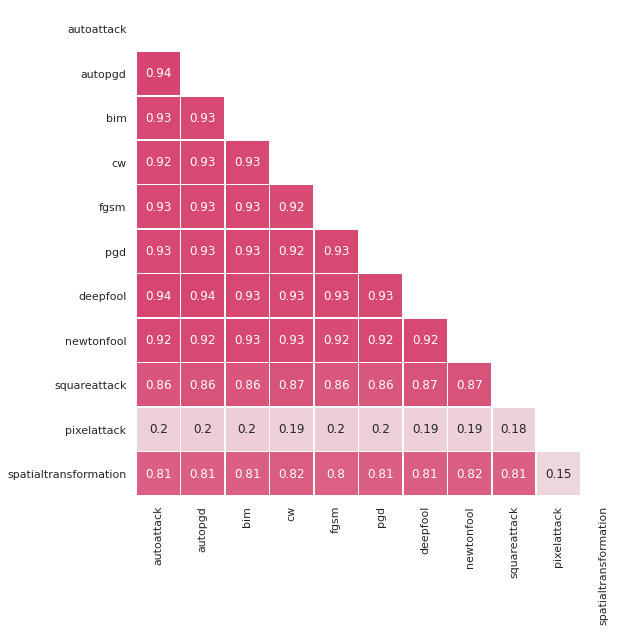

In [33]:
def plot_half_heatmap(data, cmap, path) :
    sns.set_theme(style="white")

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(data, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    f = sns.heatmap(data, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar=False, annot=True)
    f.figure.savefig(path, bbox_inches='tight')


# Generate a custom diverging colormap
cmap = sns.diverging_palette(h_neg=240, h_pos=0,s=75, l=50, n=1, as_cmap=True)

path = "plot/rq1-sim.png"

plot_half_heatmap(sim, cmap, path)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


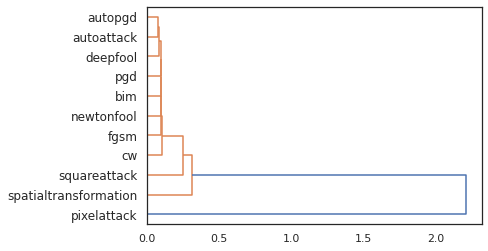

In [34]:
import scipy.cluster.hierarchy as hcluster
linkage = hcluster.linkage(1-sim)
# dendro_label = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool"] 
dendro_label = sim.columns
dendro  = hcluster.dendrogram(linkage, labels=dendro_label, orientation="right")

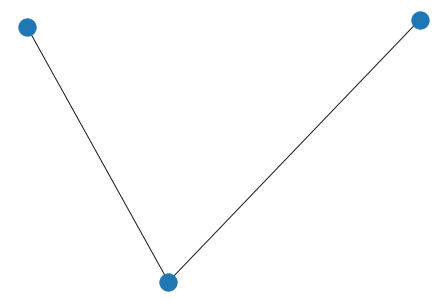

In [35]:
import networkx as nx
G = nx.Graph()
G.add_edge("A", "B")  # default edge data=1
G.add_edge("B", "C", weight=0.1)  # specify edge data

pos = nx.spring_layout(G)  # default to scale=1
nx.draw(G, pos)

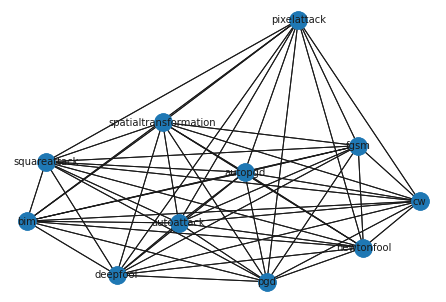

In [36]:
import networkx as nx
G = nx.Graph()

for a1 in attacks: 
    for a2 in attacks :
        G.add_edge(a1, a2, weight=sim[a1][a2])

pos = nx.spring_layout(G)  # default to scale=1
nx.draw(G, pos)
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.show() 

In [40]:
attacks = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack", "pixelattack", "spatialtransformation"]

# cluster = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool"]
cluster = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack"]
# cluster = ["autoattack", "autopgd", "bim", "pgd"]

def get_centroid(cluster, sim) :
    val = {}
    for c in cluster :
        val[c] = 0
        for c2 in cluster :
            val[c] += sim[c][c2]
    max_dist = val[cluster[0]]
    idx = cluster[0]
    for c in cluster :
        print(c, ": ", val[c])
        if val[c] > max_dist :
            max_dist = val[c]
            idx = c
    return idx
            
get_centroid(cluster, sim)

autoattack :  8.388137528195072
autopgd :  8.389578343923505
bim :  8.373302870405015
cw :  8.339771113902414
fgsm :  8.335597184804646
pgd :  8.361276235499497
deepfool :  8.385632243224759
newtonfool :  8.334198334147704
squareattack :  7.905040479824525


'autopgd'

In [37]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

def cluster(X, metric="cosine"):
    cluster = DBSCAN(
        eps=0.2,
        min_samples=1,
        metric=metric,
        algorithm="brute"
    )

    cluster.fit_predict(X)

    return cluster

labels = cluster(1-sim, "precomputed").labels_

print("Label :", labels)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(1-sim, labels))

Label : [0 0 0 0 0 0 0 0 0 1 0]
Silhouette Coefficient: 0.836


In [38]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(affinity="precomputed", linkage='average')
labels = cluster.fit_predict(1-sim)

print("Label :", labels)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(1-sim, labels))

Label : [0 0 0 0 0 0 0 0 0 1 0]
Silhouette Coefficient: 0.836


In [39]:
from sklearn.cluster import AffinityPropagation

cluster = AffinityPropagation(affinity="precomputed")
labels = cluster.fit_predict(1-sim)

print("Label :", labels)
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(1-sim, labels))

Label : [0 0 0 0 0 0 0 0 0 0 0]


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)
